In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from exploration.commons import plot_density_scatter

plt.rcParams.update({'font.size': 14})

merged_df = pd.read_csv('./temp_data/scored_issues_snapshots_w2v_cls.csv')
len(merged_df)

747

In [2]:
merged_df.head()

,idx,id,started,ended,issue_num,issue_proj,issue_reporter,issue_assignee,issue_contr_count,issue_type,...,utr_others_3,utr_others_4,utr_others_5,utr_others_6,utr_others_7,utr_others_8,utr_others_9,Q1,Q2,Q3
0,52273,1009647.0,2022-11-05 18:26:01+00:00,2022-11-05 18:34:05+00:00,1438.0,JO10DNRK,jo.dnrk.13,u1036,2.0,Ticket,...,0,0,0,0,0,0,0,0,0,0
1,52274,1009647.0,2022-11-05 18:34:05+00:00,2022-11-06 10:16:38+00:00,1438.0,JO10DNRK,jo.dnrk.13,u447,2.0,Ticket,...,0,0,1,0,0,0,0,0,0,0
2,57507,1008767.0,2022-09-20 07:06:14+00:00,2022-09-20 07:11:15+00:00,570.0,PS10NCEP,ps.ncep.08,u1095,3.0,Ticket,...,0,0,0,0,0,0,0,5,5,5
3,57508,1008767.0,2022-09-20 07:11:15+00:00,2022-09-20 11:19:20+00:00,570.0,PS10NCEP,ps.ncep.08,U943,3.0,Ticket,...,0,0,1,1,0,0,0,2,2,3
4,57509,1008767.0,2022-09-20 11:19:20+00:00,2022-09-28 11:09:11+00:00,570.0,PS10NCEP,ps.ncep.08,U1015,3.0,Ticket,...,1,0,0,1,0,0,2,0,0,0


In [3]:
merged_df[['others_comments_count','reporter_comments_count','assignee_comments_count',
           'others_utterances_count','reporter_utterances_count','assignee_utterances_count',
          'others_terms_count','reporter_terms_count','assignee_terms_count']]\
.rename(columns={
    'others_comments_count':'Others Comments',
    'reporter_comments_count':'Reporter Comments',
    'assignee_comments_count':'Assignee Comments',
    'others_utterances_count':'Others Utterances',
    'reporter_utterances_count':'Reporter Utterances',
    'assignee_utterances_count':'Assignee Utterances',
    'others_terms_count':'Others words',
    'reporter_terms_count':'Reporter Words',
    'assignee_terms_count':'Assignee Words'
})\
.describe().transpose().drop(columns=['count'])

,mean,std,min,25%,50%,75%,max
Others Comments,2.463186,6.287966,0.0,0.0,0.0,2.0,59.0
Reporter Comments,2.137885,4.269224,0.0,0.0,1.0,2.0,39.0
Assignee Comments,4.144578,8.329217,0.0,1.0,1.0,4.0,94.0
Others Utterances,9.748327,25.086197,0.0,0.0,0.0,8.0,247.0
Reporter Utterances,7.609103,20.253549,0.0,0.0,3.0,6.0,323.0
Assignee Utterances,17.045515,35.723064,0.0,2.0,4.0,15.0,428.0
Others words,33.174029,90.223534,0.0,0.0,0.0,21.0,884.0
Reporter Words,42.036145,246.168516,0.0,0.0,12.0,27.0,5727.0
Assignee Words,62.143240,128.334995,0.0,5.5,8.0,59.0,1143.0


[Text(0, -20.0, ''),
 Text(0, 0.0, ''),
 Text(0, 20.0, ''),
 Text(0, 40.0, ''),
 Text(0, 60.0, ''),
 Text(0, 80.0, '')]

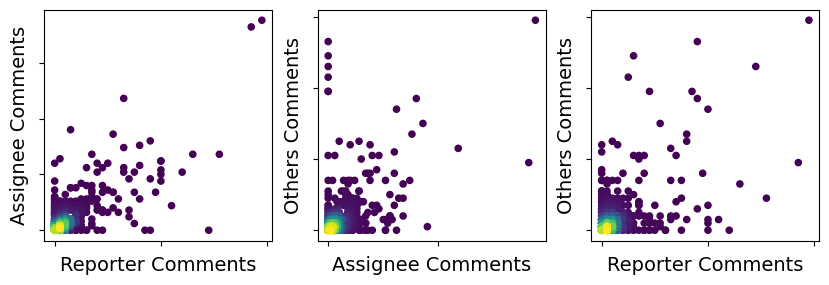

In [4]:
fig: plt.Figure = plt.figure(figsize=(10, 3))
ax: plt.Axes = fig.add_subplot(131)

ax.set_xlabel("Reporter Comments")
ax.set_ylabel("Assignee Comments")
plot_density_scatter(ax, merged_df['reporter_comments_count'], merged_df['assignee_comments_count'],
                     label="Reporter comments Vs. Assignee comments", size=20)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax: plt.Axes = fig.add_subplot(132)
ax.set_xlabel("Assignee Comments")
ax.set_ylabel("Others Comments")
plot_density_scatter(ax, merged_df['assignee_comments_count'], merged_df['others_comments_count'],
                     label="Assignee comments Vs. Others comments", size=20)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax: plt.Axes = fig.add_subplot(133)
ax.set_xlabel("Reporter Comments")
ax.set_ylabel("Others Comments")
plot_density_scatter(ax, merged_df['reporter_comments_count'], merged_df['others_comments_count'],
                     label="Reporter comments Vs. Others comments", size=20)
ax.set_xticklabels([])
ax.set_yticklabels([])

Text(0, 0.5, 'Others Comments')

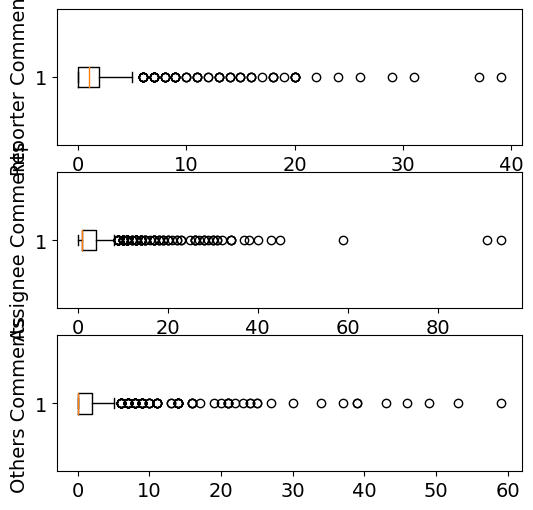

In [5]:
fig: plt.Figure = plt.figure(figsize=(6, 6))

ax: plt.Axes = fig.add_subplot(311)
ax.boxplot(merged_df[['reporter_comments_count']], vert=False)
ax.set_ylabel("Reporter Comments")

ax: plt.Axes = fig.add_subplot(312)
ax.boxplot(merged_df['assignee_comments_count'], vert=False)
ax.set_ylabel("Assignee Comments")

ax: plt.Axes = fig.add_subplot(313)
ax.boxplot(merged_df['others_comments_count'], vert=False)
ax.set_ylabel("Others Comments")

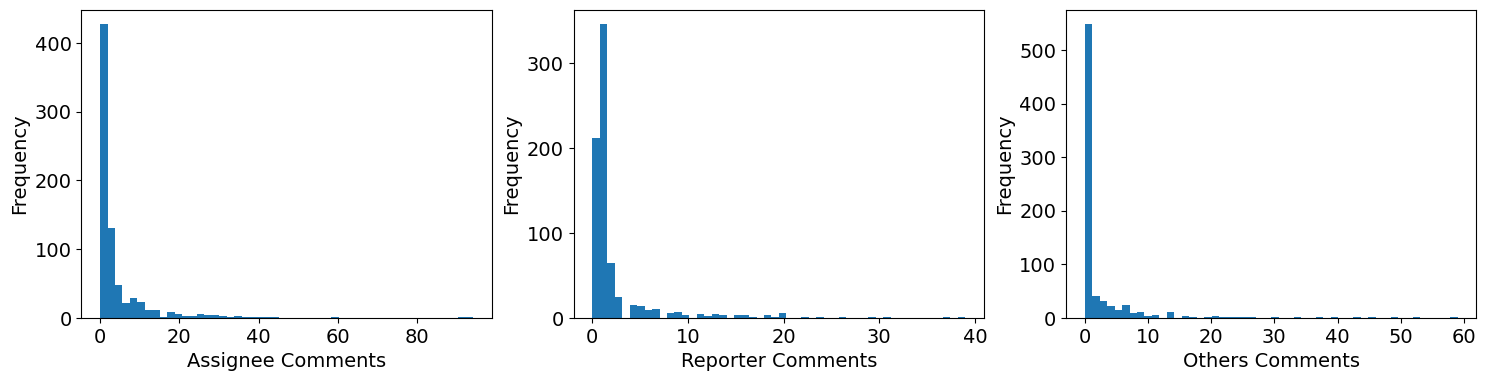

In [6]:
def __hist(ax: plt.Axes, data, x_label, y_label = 'Frequency', bins = 50):
    ax.hist(data, bins=bins)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

fig: plt.Figure = plt.figure(figsize=(18, 4))

__hist(fig.add_subplot(131), merged_df.assignee_comments_count, 'Assignee Comments')
__hist(fig.add_subplot(132), merged_df.reporter_comments_count, 'Reporter Comments')
__hist(fig.add_subplot(133), merged_df.others_comments_count, 'Others Comments')